<a href="https://colab.research.google.com/github/Emmasahakyan/zero_to_hero_ml/blob/main/arm_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
words=open("/content/arm_names_no_spaces.txt",'r').read().splitlines()

In [6]:
words[:3]

['ագաթա', 'ագապէ', 'ագապի']

In [3]:
c=sorted(set(''.join(words)))

stoi={s:i+1 for i,s in enumerate(c)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [4]:
N=torch.zeros((40,40),dtype=torch.int32)

for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1

(-0.5, 39.5, 39.5, -0.5)

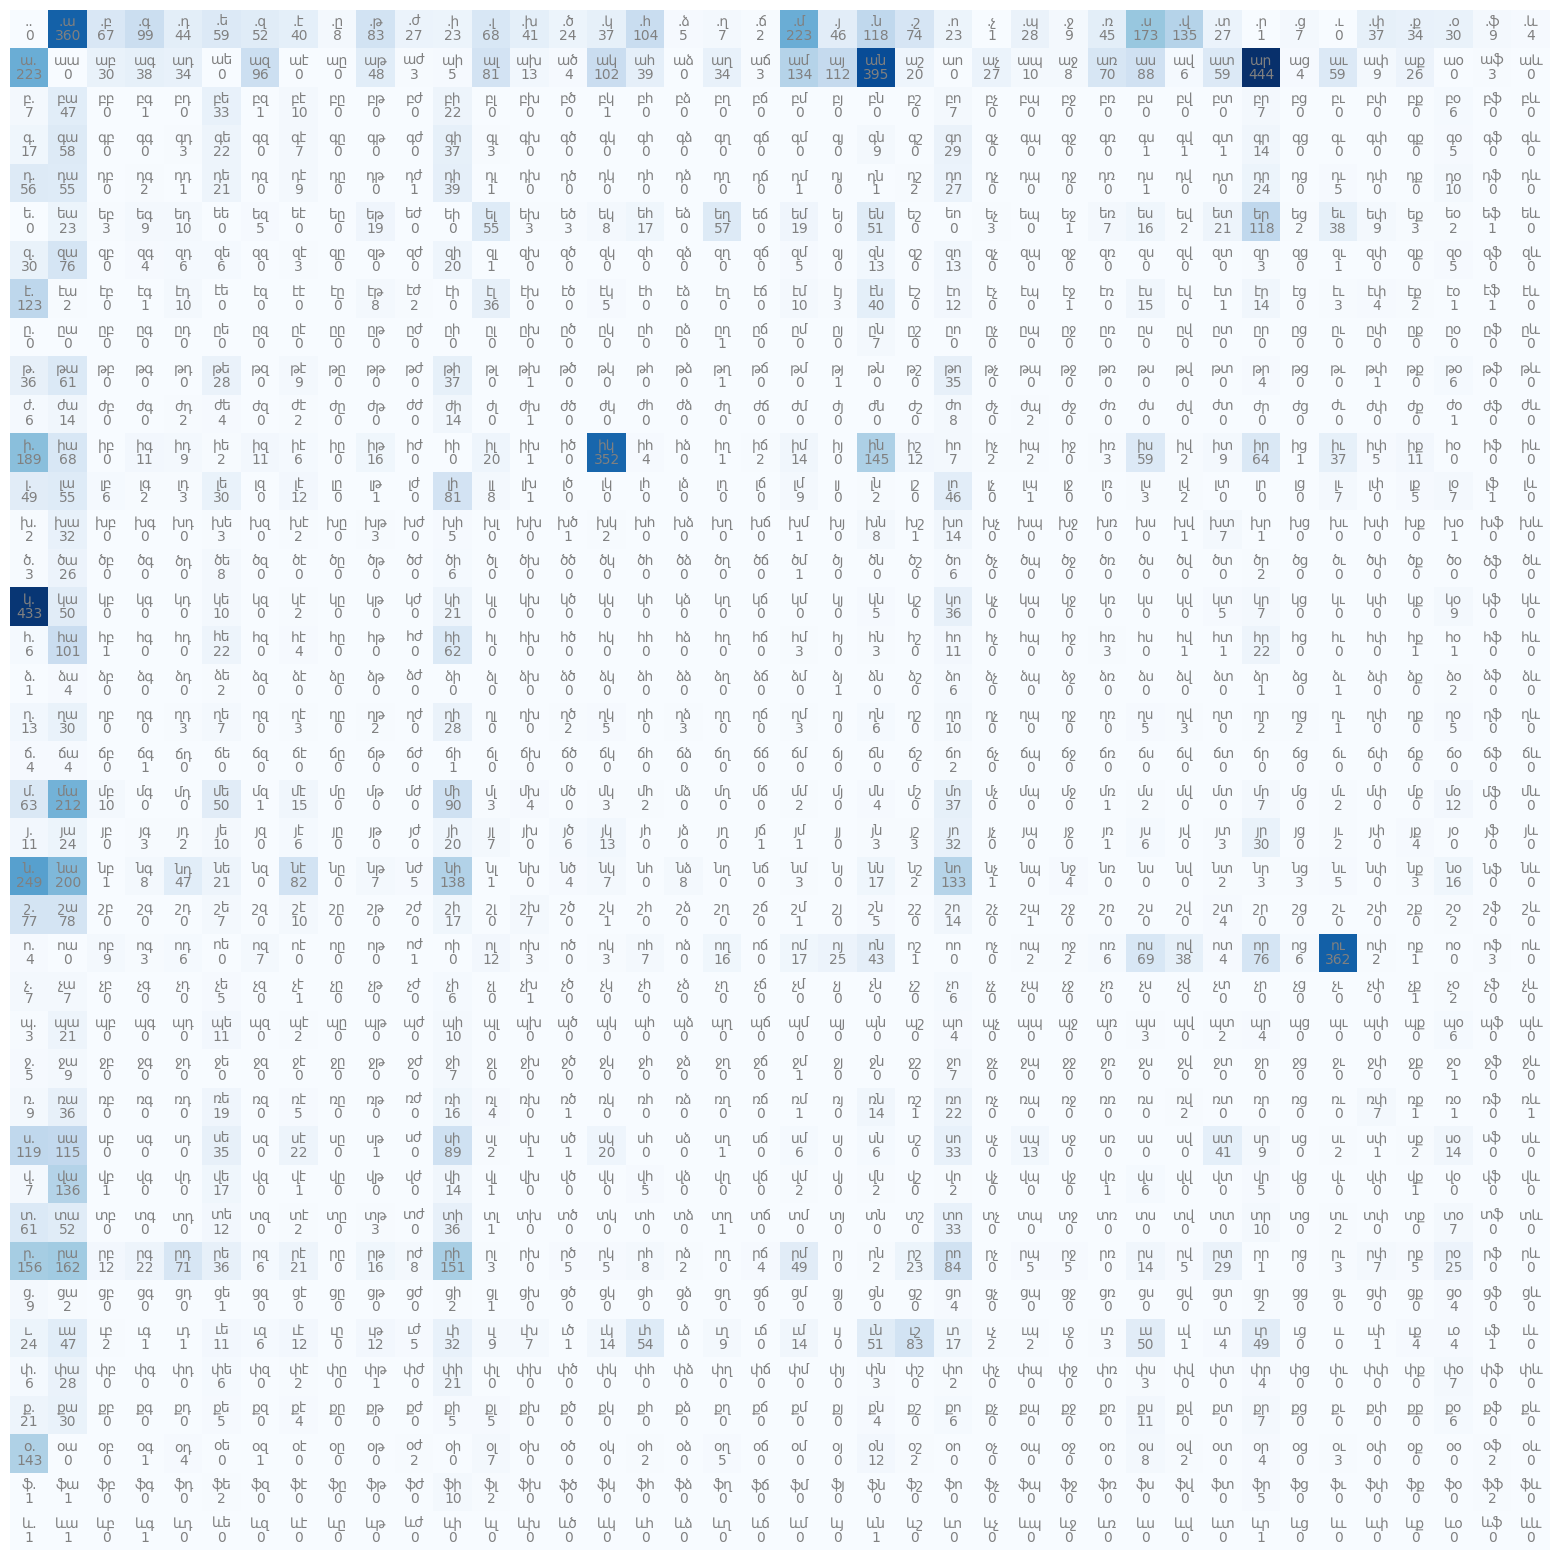

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')
for i in range(40):
  for j in range(40):
    chstr=itos[i]+itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off')

In [10]:
#not trained
for i in range(10):
  ix=0
  out=[]
  while True:
    p=torch.ones((40,40))/40.0
    ix=torch.multinomial(p[ix],num_samples=1,replacement=True).item()
    out.append(itos[ix])

    if ix==0:
      break
  print(''.join(out))

կմնւցսդչճմհֆչթշգռժլձշթփկծֆողըփաձթիգլհհլխըռծպկչյպև.
վխքյովշսբօնքըքյիփքպջհւպցէշօլչթէհֆճկֆւպջգըժօխւբըռձծն.
զքտմճռբշ.
յցկծտֆցչվբժցզավկվձճ.
պմշդծձխզծդջիդղիտձոլժիղճխ.
շևնշհղիլևֆլշիդթէբճխկվռջճչզդծքջձգգթչֆւյըշջլքպնթղփչվռտճքժռո.
ճձտոզշչևթչկշկշևտքռծ.
չֆթառշհղտծյւչհտսմձջի.
չճցքէևճէցչսչէդրվովյիջժթռտժժչխգիլքքտբվղռմշգձժռեսամբշօւճգպթաէկաճճդըծըէռշըղշհճժֆզ.
ճէպվէծհծւաիմխչկվբդկէլցբվ.


In [6]:
p=(N+1).float()
p=p/p.sum(1,keepdim=True)

In [7]:
for i in range(10):
  ix=0
  out=[]
  while True:
    ix=torch.multinomial(p[ix],num_samples=1,replacement=True).item()
    out.append(itos[ix])

    if ix==0:
      break
  print(''.join(out))

զքազարգրմհանինէմակդանաթանդրոսա.
պսիազա.
ելիրդր.
ն.
ն.
վարշիարգերվնէորելուհոսմեւնուշ.
հրիկ.
մոնիարրմիլմօ.
նուր.
շիկ.


In [8]:
#the error-loglike
log_likelihood=0.0
num=0

for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    num+=1
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=p[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    #print(f'{(ch1,ch2)} : {prob} ։ {prob:.4f} : {logprob:.4f}')

nll=(-log_likelihood)/num

print(f'{nll}')

2.4032723903656006


In [14]:
#end of bigrams
#on to nn approach to the same problem

In [53]:
xs,ys=[],[]

for w in words[:1]:
  chstr=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)
xs

tensor([ 0, 38, 32, 11, 15])

In [54]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=40).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [55]:
W=torch.randn((40,40),requires_grad=True)
xenc @ W

tensor([[-1.3047e+00,  6.4766e-01, -4.9938e-01, -1.2417e+00, -6.3584e-01,
          5.4005e-01,  1.3978e+00, -1.8790e-01, -7.6202e-01,  8.6150e-01,
          7.0023e-01,  1.9519e-01, -5.4815e-01, -1.5975e+00, -4.0615e-01,
         -1.7977e-01,  2.8620e+00,  7.5611e-02, -5.6187e-01,  3.9921e-01,
         -9.9220e-01, -3.0732e+00, -5.1928e-01, -9.7945e-02, -3.1998e-01,
         -1.4776e+00,  1.4304e+00,  6.9357e-01, -2.5793e-01,  1.3906e-01,
          1.7402e+00,  1.4593e-01,  1.4871e+00, -3.6576e-01,  1.1844e+00,
         -1.2789e+00,  1.0946e+00,  3.0053e-01, -1.0648e+00,  1.0857e+00],
        [-1.5439e+00,  7.6975e-02, -3.9012e-01, -6.5764e-01,  3.5877e-01,
          9.5351e-01,  7.3575e-01,  1.9089e-01, -1.0037e+00,  1.5680e-01,
          3.8527e-01,  4.2009e-01, -1.8281e-01, -3.4426e-01,  3.6488e-01,
          3.3364e-01,  1.2248e+00, -5.6549e-01, -1.2685e+00, -3.5381e-01,
         -7.7258e-02,  4.7861e-01, -1.6169e+00,  7.2540e-01, -7.8778e-01,
         -1.7622e+00, -7.8782e-01, -1

In [56]:
logits=(xenc @ W)
counts= (xenc @ W).exp()
probs=counts/counts.sum(1,keepdim=True)
probs[1,:].sum()
loss=-probs[torch.arange(5),ys].log().mean()
loss

tensor(4.2230, grad_fn=<NegBackward0>)

In [106]:
num=xs.nelement()
for k in range(10):
  xenc=F.one_hot(xs,num_classes=40).float()
  logits=xenc @ W
  counts= (xenc @ W).exp()
  probs=counts/counts.sum(1,keepdim=True)
  loss=-probs[torch.arange(5),ys].log().mean()

  print(loss.item())

  W.grad=None
  loss.backward()

  W.data+=-0.1*W.grad

0.25077876448631287
0.24973848462104797
0.2487057000398636
0.24768057465553284
0.2466629445552826
0.2456526756286621
0.24464979767799377
0.24365413188934326
0.24266557395458221
0.24168424308300018


In [107]:
for i in range(10):
  ix=0
  out=[]

  while True:
    xenc=F.one_hot(torch.tensor([ix]),num_classes=40).float()
    logits=xenc @ W
    counts=logits.exp()
    p=counts/counts.sum(1,keepdim=True)

    ix=torch.multinomial(p,num_samples=1,replacement=True).item()
    out.append(itos[ix])
    if ix==0:
      break

  print(''.join(out))

ֆջկ.
ֆրիկ.
ֆրիկ.
զգհևջէիկոցդվձ.
ժփֆրիկ.
ոռղցղնջթետըվձձֆրիկձւհցծհցաւֆրիկ.
ճրիաոֆրիկճգլյըմկ.
ֆրիկջոււհլսձւծշռբէնևսբգոցդլսիկ.
ֆրիտտպռչցդխպքշմձփեղճըփոխշջլքաևսճիկ.
ֆրիկ.
